In [99]:
# Task 1: (5 points) Data Exploration 
# Handle missing values

# The scikit-learn implementation of Decision Trees does not support missing values. 
# You can drop the rows with missing values. 

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score

# Ranaming the columns
all_columns = ['Age', 'Workclass', 'Education','Martial Status', 'Occupation', 
               'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 
               'Hours per week', 'Country', 'Target']

# Loading the train data
adult_census = pd.read_csv('data/adult_train.txt', names = all_columns,na_values=" ?")

In [101]:
# Check the top few rows 
adult_census.head()
# checking the shape to confirm the correctness 
adult_census.shape

(32561, 13)

In [102]:
# Checking out Target column values counts
target_column = 'Target'
adult_census[target_column].value_counts()

 <=50K    24720
 >50K      7841
Name: Target, dtype: int64

In [103]:
# Selecting only numeric values columns
all_numeric_columns = ['Age', 'Capital Gain','Capital Loss', 'Hours per week']

# Selecting only categorical values columns
all_categorical_columns = ['Workclass', 'Education',
         'Martial Status', 'Occupation	', 'Relationship	',
         'Race', 'Sex','Country']

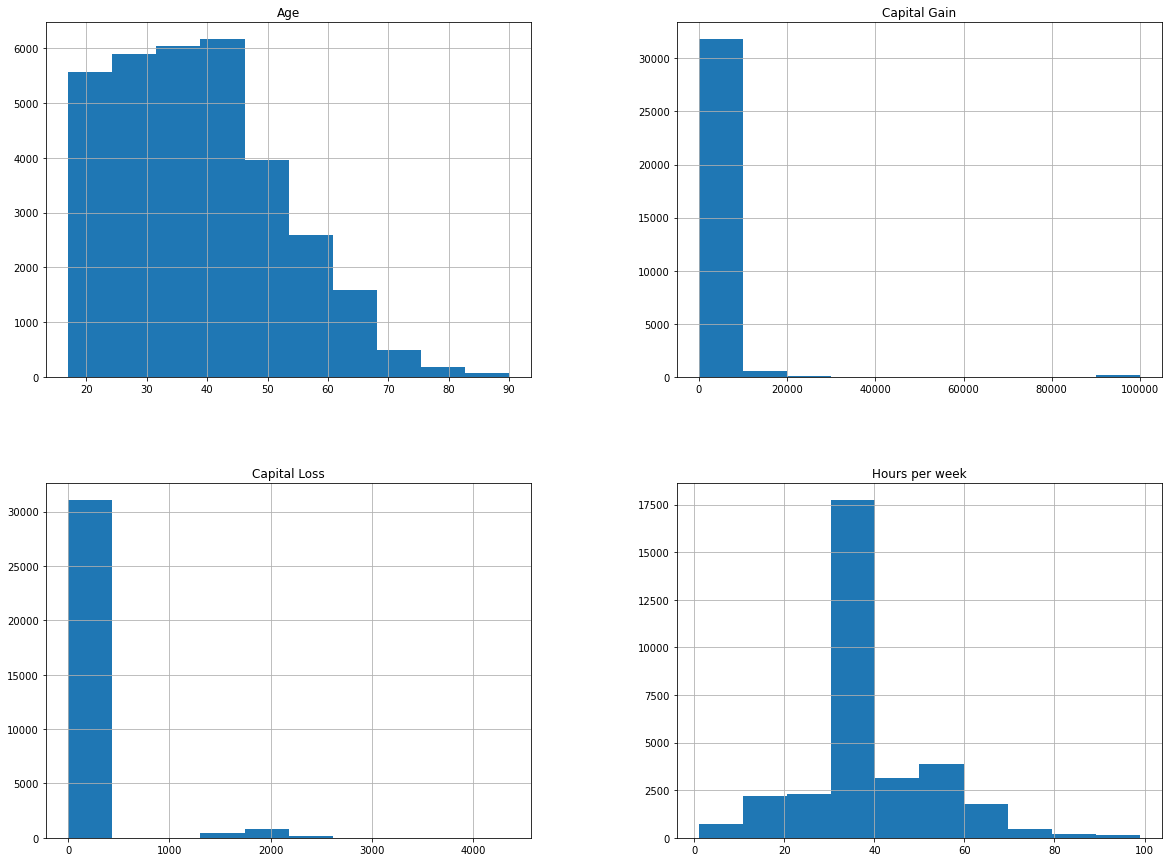

In [104]:
# Displaying histogram of the data for better undestanding.
_ = adult_census.hist(figsize=(20, 15))

In [105]:
# Drop all rows that have nan in them.
adult_census[adult_census.isna().any(axis=1)]
adult_census = adult_census.dropna()

In [106]:
# Task 2: (10 points) More preprocessing

# A limitation of scikit-learn's DecisionTreeClassifier and RandomTreeClassifier is that they do not accept 
# non-numeric values. That is, the categorical features cannot be used as-is. One way to overcome this is 
# to transform the feature space, making one binary-valued feature out of each value of the categorical 
# features while keeping the numeric features intact. You can use scikit-learn's OneHotEncoder for this. 

# When transforming the original data records, numeric (i.e., continuous) features remain unchanged. 
# Each binary-valued feature that replaces the categorical features is set to 1 or 0 depending on 
# whether the original categorical feature takes the relevant value. 

# Finally, randomly assign the data points to the training set (70%) and validation set (30%). 
# Use the last two digits of your student ID as the seed for the random assignment. 

# Tip: It would be helpful to save the output of the first two tasks to a text or a CSV file. 
# You can write a DataFrame into a CSV fileLinks to an external site..

In [107]:
# Assigning Target column to target variable. Creating new dataframe without Target column.
target = adult_census['Target']
data = adult_census.drop(columns=[target_column])

In [108]:
# Checking if the deletion of the column was successful.
data.head()
data.columns

Index(['Age', 'Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Country'],
      dtype='object')

In [109]:
# Creating new dataframe with only numerical columns.
data_numeric = data[all_numeric_columns]

In [110]:
# Loading the test data.
adult_census_test = pd.read_csv('data/adult_test.txt', 
                                names = all_columns,                                 
                                skiprows=1
                                )

In [111]:
adult_census_test.head()

,Age,Workclass,Education,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [112]:
# Cleaning the Target column data.
adult_census_test['Target'].replace(r'\.$', '', regex = True, inplace=True)

In [113]:
adult_census_test.head()

,Age,Workclass,Education,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [114]:
# Separate the target from the data
target_test = adult_census_test[target_column]
data_test = adult_census_test.drop(columns = [target_column])

In [115]:
print(f"The test dataset contains {data_test.shape[0]} samples and "
f"{data_test.shape[1]} features.")

The test dataset contains 16280 samples and 12 features.


In [116]:
# Select the numeric columns from the test data 
data_test_numeric = data_test[all_numeric_columns]
data_test_numeric.head()

,Age,Capital Gain,Capital Loss,Hours per week
0,38,0,0,50
1,28,0,0,40
2,44,7688,0,40
3,18,0,0,30
4,34,0,0,30


In [117]:
# Spliting the training data.
data_train, data_validation, target_train, target_validation = train_test_split(
    data_numeric, 
    target, 
    random_state = 64, 
    test_size = 0.30
)

In [118]:
print(f"Number of validation samples: {data_validation.shape[0]}"
f"{data_validation.shape[0]/ data_numeric.shape[0] * 100.0: 0.2f} % of the "
f" training dataset.")

Number of validation samples: 9049 30.00 % of the  training dataset.


In [119]:
# Task 3 (10 points) Tune Decision Tree Classifier

# If we use all the features from the training set, we can call the resulting tree a full-depth Decision Tree. 
# Unfortunately, such full-depth trees are prone to overfitting. One way to address this is via pruning; 
# scikit-learn uses a post-pruning strategy that is not straightforward. 
# Instead, use two parameters available in the DecisionTreeClassifier that you can tune: max_depth, 
# which limits the depth of the decision tree, and min_samples_leaf Which requires that every leaf 
# has at least this many data points. Generate two plots where on the X-axis you vary one of the parameters, 
# and on the Y-axis, you show classification accuracy. Each plot should have two lines on it, 
# one for accuracy on training_set and another for accuracy on validation_set. Save your best choices of parameters. 

# max_depth = [1, 2, 3, ..., 30]
# min_samples_leaf = [1, 2, 3, ..., 50] 


In [120]:
# Creating a Decision  Tree model and feeding it data.
model_dt = DecisionTreeClassifier()
model_dt.fit(data_train, target_train)

DecisionTreeClassifier()

In [121]:
# Calculating validation accuracy
accuracy = model_dt.score(data_validation, target_validation)
model_name = model_dt.__class__.__name__

print(f"The validation accuracy using a {model_name} is "
f"{accuracy: .3f}")

The validation accuracy using a DecisionTreeClassifier is  0.810


In [122]:
# Calculating test accuracy
test_accuracy = model_dt.score(data_test_numeric, target_test)
print(f"The test accuracy using a {model_name} is "
f"{test_accuracy: .3f}")

The test accuracy using a DecisionTreeClassifier is  0.816


In [123]:
# Create lists to hold max depth and min_sample_leaf values and their accuracy
train_accuracy_max_depth = list()
validation_accuracy_max_depth = list()

train_accuracy_min_samples_leaf  = list()
validation_accuracy_min_samples_leaf  = list()

In [124]:
# Create Decision Tree with different max_depth. Check its accuracy.
for i in range(1, 31):
  dt_model = DecisionTreeClassifier(max_depth = i)
  dt_model.fit(data_train, target_train)
  train_accuracy_max_depth.append(dt_model.score(data_train, target_train))
  validation_accuracy_max_depth.append(dt_model.score(data_validation, target_validation))

# Create Decision Tree with different min_samples_leaf. Check its accuracy.
for i in range(1, 51):
  dt_model_leaf = DecisionTreeClassifier(min_samples_leaf = i)
  dt_model_leaf.fit(data_train, target_train)
  train_accuracy_min_samples_leaf.append(dt_model_leaf.score(data_train, target_train))
  validation_accuracy_min_samples_leaf.append(dt_model_leaf.score(data_validation, target_validation))

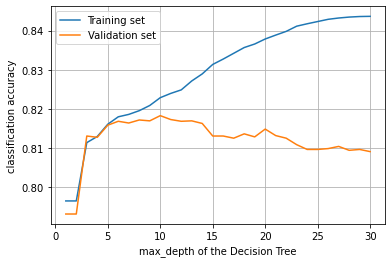

In [125]:
# Displaying plot of Decision Tree and depth, their accuracy.
max_depth = list(range(1, 31))
plt.plot(max_depth, train_accuracy_max_depth, label = "Training set")
plt.plot(max_depth, validation_accuracy_max_depth, label = "Validation set")
plt.xlabel("max_depth of the Decision Tree")
plt.ylabel("classification accuracy")
plt.grid()
plt.legend()

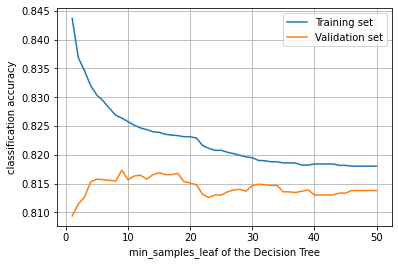

In [126]:
# Displaying plot of Decision Tree and min_samples_leaf, their accuracy.
min_samples_leaf = list(range(1, 51))
plt.plot(min_samples_leaf, train_accuracy_min_samples_leaf, label = "Training set")
plt.plot(min_samples_leaf, validation_accuracy_min_samples_leaf, label = "Validation set")
plt.xlabel("min_samples_leaf of the Decision Tree")
plt.ylabel("classification accuracy")
plt.grid()
plt.legend()

In [127]:
# Displaying accuracy for optimal depth  for Decision Tree
optimal_depth = np.argmax(validation_accuracy_max_depth)
print(f"The optimal depth of the tree is {optimal_depth}")
print(f"The highest accuracy in the validation set is {np.max(validation_accuracy_max_depth)}")

The optimal depth of the tree is 9
The highest accuracy in the validation set is 0.8183224665708918


In [128]:
# Displaying accuracy for optimal min_samples_leaf  for Decision Tree
optimal_min_samples_leaf = np.argmax(validation_accuracy_min_samples_leaf)
print(f"The optimal min samples leaf of the tree is {optimal_min_samples_leaf}")
print(f"The highest accuracy in the validation set is {np.max(validation_accuracy_min_samples_leaf)}")

The optimal min samples leaf of the tree is 8
The highest accuracy in the validation set is 0.8173278815338711


In [129]:
# Creating a Decision  Tree model and feeding it data.Using optimal depth and min_samples_leaf
model_dt = DecisionTreeClassifier(max_depth = optimal_depth, min_samples_leaf=optimal_min_samples_leaf)
model_dt.fit(data_numeric, target)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=8)

In [130]:
# Displaying accuracy of Decision Tree
prediction_accuracy = model_dt.score(data_test_numeric, target_test)
print(f"The prediciton accuracy on the test set is {prediction_accuracy}")

The prediciton accuracy on the test set is 0.8248771498771499


In [131]:
# Task 4 (10 points) Tune Random Forest Classifier.

# One of the parameters to tune the Random Forest Classifier is the number of trees in the ensemble 
# (n_estimators in scikit-learn). As before, generate two plots with classification accuracy (Y-axis) 
# of training_set and validation_set vs. (X-axis):

#     n_estimators = [1, 2, 3, ..., 50], with all other parameters set to default.
#     n_estimators = [1, 2, 3, ..., 50], with max_depth and min_samples_leaf chosen using your best results from Task 3. 


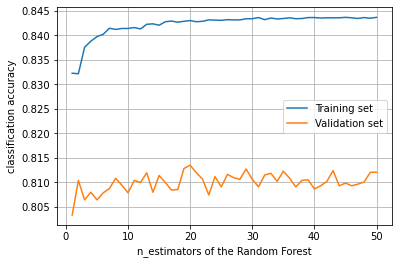

In [132]:
train_accuracy_random_forest  = list()
validation_accuracy_random_forest  = list()

# Creating Random Forest model and fine tuning it.
for i in range(1, 51):
  dt_model_forest = RandomForestClassifier(n_estimators = i)
  dt_model_forest.fit(data_train, target_train)
  train_accuracy_random_forest.append(dt_model_forest.score(data_train, target_train))
  validation_accuracy_random_forest.append(dt_model_forest.score(data_validation, target_validation))

# Displaying Random Forest with best n_estimator
n_estimators = list(range(1, 51))
plt.plot(n_estimators, train_accuracy_random_forest, label = "Training set")
plt.plot(n_estimators, validation_accuracy_random_forest, label = "Validation set")
plt.xlabel("n_estimators of the Random Forest")
plt.ylabel("classification accuracy")
plt.grid()
plt.legend()

In [133]:
# Displaying Random Tree Accuracy with validation.
optimal_n_estimators = np.argmax(validation_accuracy_random_forest)
print(f"The optimal n_estimators of the tree is {optimal_depth}")
print(f"The highest accuracy in the validation set is {np.max(validation_accuracy_random_forest)}")

The optimal n_estimators of the tree is 9
The highest accuracy in the validation set is 0.8134600508343464


In [134]:
# Displaying Random Tree Accuracy with trai data.
model_forest = RandomForestClassifier(n_estimators = optimal_n_estimators, max_depth=optimal_depth, min_samples_leaf=optimal_min_samples_leaf)
model_forest.fit(data_train, target_train)
prediction_accuracy = model_forest.score(data_test_numeric, target_test)
print(f"The prediciton accuracy on the test set using Random Forest is {prediction_accuracy}")

The prediciton accuracy on the test set using Random Forest is 0.8233415233415233


In [135]:
# Task 5 (10 points) Evaluate your model using test data

# Train your best configuration of DecisionTreeClassifier and RandomForestClassifier (both) 
# on the entire training data, and report their performance on the test dataset using the following metrics:

#     Accuracy
#     Confusion MatrixLinks to an external site. 
#     PrecisionLinks to an external site. and RecallLinks to an external site.  


In [136]:
# Spliting train data.
X_train, X_test, y_train, y_test = train_test_split(
    data_numeric, 
    target, 
    random_state = 1, 
)


In [137]:
# Displaying accuracy of Decision Tree and Random Forest models
model_tree = DecisionTreeClassifier(max_depth = i)
model_tree.fit(X_train, y_train)
y_pred_tree_test = model_tree.predict(X_test)
    
model_forest = RandomForestClassifier(n_estimators = 5, max_depth=5, min_samples_leaf=4)
model_forest.fit(X_train, y_train)
y_pred_forest_test = model_forest.predict(X_test)

prediction_tree_accuracy = model_tree.score(data_test_numeric, target_test)
print(f"The prediciton accuracy on the tree test set is {prediction_tree_accuracy}")

prediction_forest_accuracy = model_forest.score(data_test_numeric, target_test)
print(f"The prediciton accuracy on the forst test set is {prediction_forest_accuracy}")

The prediciton accuracy on the tree test set is 0.8152334152334152
The prediciton accuracy on the forst test set is 0.8203931203931204


In [138]:
# Loading train data. Cleaning it and prepare it to feed it to the models.
df = pd.read_csv('data/adult_train.txt', names = all_columns,na_values=" ?")
df[df.isna().any(axis=1)]
df = df.dropna()
df_numeric = df[all_numeric_columns]
# Split dataset into features and target
y = df[target_column]
X = df.drop(columns = [target_column])

# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_numeric, 
    target, 
    random_state = 64, 
    test_size = 0.30
)

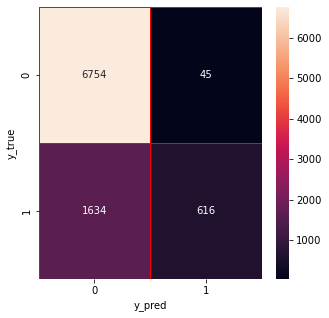

Recall score: 0.27
Precision score: 0.93


In [139]:
# Displaying accuracy, confusion metrics, recall score and precision score of Random Forest
forest = RandomForestClassifier(n_estimators = 5, max_depth=5, min_samples_leaf=4)
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt =".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

rs = recall_score(y_test, y_pred_test, pos_label=' >50K')
print('Recall score: {0:0.2f}'.format(rs))

ps = precision_score(y_test, y_pred_test, pos_label=' >50K')
print('Precision score: {0:0.2f}'.format(ps))

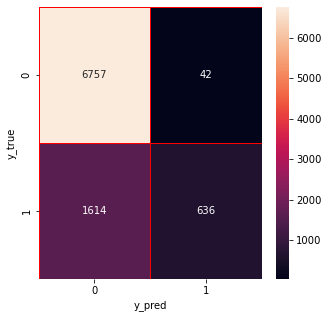

Recall score: 0.28
Precision score: 0.94


In [140]:
# Displaying accuracy, confusion metrics, recall score and precision score of Decision Tree

tree = DecisionTreeClassifier(max_depth = optimal_depth, min_samples_leaf=optimal_min_samples_leaf)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt =".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

rs = recall_score(y_test, y_pred_test, pos_label=' >50K')
print('Recall score: {0:0.2f}'.format(rs))


ps = precision_score(y_test, y_pred_test, pos_label=' >50K')
print('Precision score: {0:0.2f}'.format(ps))

In [142]:
# Task 6 (3 points) Reflection

# Share your experience of working on this assignment. What was the most exciting part of it? 
# What was the most challenging one? What did you learn from completing the assignment? 



# Overall I enjoyed this assignment. I was challeging and I had to research a lot. 
# The most exciting part was to see that my models work and to see their accuracy.
# The most challenging part was clearning the data and feeding it to the models. 
# I had to redo, test and reload the data multiple times before I prepared it the correct way.
# What I learned was, that I need to first understand the data, before I start cleaning and preparing it.